In [8]:
import numpy as np
import pandas as pd
import matplotlib

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
matplotlib.rc('text', usetex=True)
matplotlib.rcParams.update({"font.size":16})
matplotlib.rcParams.update({"font.family":"serif"})
import os
import sys

sys.path.append(os.path.abspath('../..'))
from modules import io

In [155]:
#MODEL = "0110"

#MODEL = "0144"

MODEL = "coronary"

#PATH  = "aorta"
#PATH  = "right_iliac"

#PATH = "aorta"
#PATH = "celiac_hepatic"
#PATH = "celiac_splenic"
#PATH = "ext_iliac_left"
#PATH = "renal_left"
#PATH = "renal_right"
#PATH = "SMA"

## coronary paths ##
#PATH = "lc1"
#PATH = "lc1_sub1"
#PATH = "lc1_sub2"
#PATH = "lc1_sub3"
#PATH = "lc2"
PATH = "lc2_sub1"

#CASE  = "sim_wom_rcr"
CASE = "sim_cor_inflow"

mesh  = "coarse"

gen   = 2

quants   = [
 "radius_actual",
 "pressure_0",
 "vWSS_3_boundary",
 "velocity_3"
]

labels = [
    r"radius $(cm)$",
    r"pressure $(mmHg)$",
    r"TAWSS magnitude $(dyne/cm^2)$",
    r"Velocity magnitude $(cm/s)$"
]

dt       = 0.004

DIR = "/media/marsdenlab/Data1/UQ/"+MODEL+"/"+CASE+"/csv/"+str(gen)+"_edit.csv"
    
df = pd.read_csv(DIR)

OUTPUT = "/media/marsdenlab/Data1/UQ/"+MODEL+"/"+CASE+"/"+str(gen)+"/"+PATH
io.mkdir(OUTPUT)
OUTPUT = OUTPUT+'/'+mesh
io.mkdir(OUTPUT)

models   = df['model'].unique()

#df = pd.read_csv(CSV)
#df = df.loc[df['mesh']==mesh]
#df = df.loc[df['generation'] == gen]

df['pressure_0'] = df['pressure_0']

points = df['point'].unique()
print(points)

[ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 21 22 23 24 25 26 27 28 29 30
 32 33 34 37 38  0  1  2  3  4 19 20 31 35 36 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59]


In [156]:
df = df.loc[df['path']==PATH]

In [157]:
df.iloc[:10]

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,area,generation,length,mesh,model,nx,ny,...,velocity_0_boundary,velocity_1,velocity_1_boundary,velocity_2,velocity_2_boundary,velocity_3,velocity_3_boundary,x,y,z
760017,942057,0,0,0.175511,1,1.511459,coarse,1,-0.863142,0.069837,...,0.0,3.701614,0.0,-2.145349,0.0,5.328179,0.0,-11.4303,8.64572,-4.23345
760018,942058,1,1,0.175511,1,1.511459,coarse,1,-0.863142,0.069837,...,0.0,3.417694,0.0,-1.991627,0.0,4.932664,0.0,-11.4303,8.64572,-4.23345
760019,942059,2,2,0.175511,1,1.511459,coarse,1,-0.863142,0.069837,...,0.0,1.199193,0.0,-0.716765,0.0,1.935815,0.0,-11.4303,8.64572,-4.23345
760020,942060,3,3,0.175511,1,1.511459,coarse,1,-0.863142,0.069837,...,0.0,1.299748,0.0,-0.766364,0.0,1.889958,0.0,-11.4303,8.64572,-4.23345
760021,942061,4,4,0.175511,1,1.511459,coarse,1,-0.863142,0.069837,...,0.0,2.005712,0.0,-1.166822,0.0,2.891273,0.0,-11.4303,8.64572,-4.23345
760022,942062,5,5,0.175511,1,1.511459,coarse,1,-0.863142,0.069837,...,0.0,2.281145,0.0,-1.324962,0.0,3.286456,0.0,-11.4303,8.64572,-4.23345
760023,942063,6,6,0.175511,1,1.511459,coarse,1,-0.863142,0.069837,...,0.0,2.617983,0.0,-1.520871,0.0,3.772230,0.0,-11.4303,8.64572,-4.23345
760024,942064,7,7,0.175511,1,1.511459,coarse,1,-0.863142,0.069837,...,0.0,4.094672,0.0,-2.387317,0.0,5.905122,0.0,-11.4303,8.64572,-4.23345
760025,942065,8,8,0.175511,1,1.511459,coarse,1,-0.863142,0.069837,...,0.0,6.496757,0.0,-3.847742,0.0,9.387366,0.0,-11.4303,8.64572,-4.23345
760026,942066,9,9,0.175511,1,1.511459,coarse,1,-0.863142,0.069837,...,0.0,8.027596,0.0,-4.831957,0.0,11.549712,0.0,-11.4303,8.64572,-4.23345


In [158]:
# if PATH == "lc1":
#      df = df.loc[(df['point']!=31) & (df['point']!=35)]

# if PATH == "lc1_sub1":
#      df = df.loc[(df['point']!=14)]    
        
# if PATH == "lc1_sub2":
#      df = df.loc[(df['point']!=4) & (df['point']!=5) & (df['point']!=3)]    

# #if PATH == "lc1_sub3":
# #    df = df.loc[(df['point']!=5) & (df['point']!=6) & (df['point']!=7) & (df['point']!=8)\
# #               & (df['point']!=9) & (df['point']!=4) & (df['point']!=10) & (df['point']!=11)]    

# if PATH == "lc2":
#     df = df.loc[(df['point']!=14) & (df['point']!=15)]    

# if PATH == "lc2_sub1":
#     df = df.loc[(df['point']!=7)]    


In [159]:
df_mean = df.groupby(['point','model']).mean().groupby('point').mean()
df_std  = df.groupby(['point','model']).mean().groupby('point').std()

df_std['x'] = df_mean['x']
df_std['y'] = df_mean['y']
df_std['z'] = df_mean['z']

df_mean['path'] = PATH
df_std['path'] = PATH

df_mean.to_csv(OUTPUT+'/mean.csv')
df_std.to_csv(OUTPUT+'/std.csv')
print(df_std['vWSS_3_boundary'].iloc[:]/df_mean['vWSS_3_boundary'].iloc[:])

point
0     0.103566
1     0.105479
2     0.107846
3     0.116662
4     0.110057
5     0.217647
8     0.408811
9     0.152762
10    0.131043
11    0.127113
12    0.123785
13    0.122988
14    0.120359
15    0.122531
16    0.123898
17    0.120959
18    0.124089
19    0.121806
20    0.119450
21    0.120624
22    0.120642
23    0.124792
24    0.131930
25    0.132932
26    0.134682
27    0.137069
28    0.138593
29    0.143473
30    0.145912
31    0.150784
32    0.151762
33    0.151339
34    0.150516
35    0.148685
36    0.149852
37    0.147811
38    0.145025
39    0.146363
40    0.147609
41    0.142852
42    0.145305
43    0.145669
44    0.145642
45    0.143974
46    0.142663
47    0.144623
48    0.142767
49    0.140806
50    0.142488
51    0.142802
52    0.144572
53    0.143048
54    0.142371
55    0.145210
56    0.146292
Name: vWSS_3_boundary, dtype: float64


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


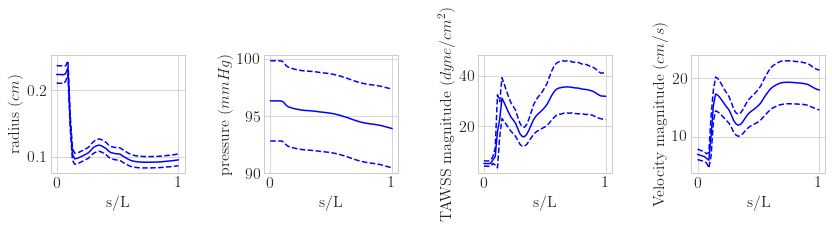

In [160]:
Size  = 3
count = 0
Wplot = len(labels)
f, axarr = plt.subplots(1, Wplot, figsize=(Wplot*Size,Size))
for i,q in enumerate(quants):

    Y = df_mean[q].values
    S = df_std[q].values
    X = np.arange(len(Y))*1.0/(len(Y)-1)

    label = labels[i]

    
    axarr[i].plot(X,Y, color='b')
    axarr[i].plot(X,Y+2*S,color='b',linestyle='--')
    axarr[i].plot(X,Y-2*S,color='b',linestyle='--')
    axarr[i].set_xlabel("s/L")
    axarr[i].set_ylabel(label)
    axarr[i].legend()

plt.tight_layout()
plt.savefig(OUTPUT+'/avg.png'.format(q),dpi=300)
plt.savefig(OUTPUT+'/avg.pdf'.format(q),dpi=200)

plt.show()
plt.close()